In [1]:
%cd ..

/home/simone/Documents/uni/postdoc/projects/synaptic_filter


In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd
import itertools as it
import scipy.stats as stats

from src.plotting import *
from src.update_functions import *
from src.init_functions import *
from src.run_functions import *

def expspace(a0, an, n=50):
    """ linspace in exp space """
    return (a0 * np.exp(np.log(an / a0) * np.linspace(0, 1, n)))

In [3]:
p = {
    't_num': 4000,                   # number of time steps (in dt) of simulation
    'dt': 0.001,                     # time step of sim
    'dim':2,                         # number of snypases / weights
    'tau':0.025,                     # membrane time const
    'g0':1,                          # base firing rate of neuron
    'beta':0.5,                      # steepness of exponentail gain function
    'mu_ou':0,                       # ou-mean of hidden weight
    'sig2_ou':1,                     # ou-variance of hidden weight
    'tau_ou':1000,                   # time scale of hidden weight
    'rule':'corr'                    # init learning rule used in sims
}                   

p['g0dt'] = p['g0']*p['dt'] 
                      
# STDP
#p['delta_T'] = 0.01  # for STDP experiments
#p['wait'] = 0.5 # s   # for STDP experiments
                      
# correlation protocol
#p['correlated_times'] = np.array([0, 0.01]) # s, two spikes   # for STDP experiments
                      
# bias
p['include-bias'] = False            # set first input to 1, making the first weight a bias
#p['sig2_oub'] = 1   # for STDP experiments
#p['tau_oub'] = 0.025   # for STDP experiments
#p['mu_oub'] = 1.0   # for STDP experiments
                      
# spike response
p['include-spike-response-kernel'] = True  # for refractory period, an exponentail
p['tau_alpha'] = 0.025  # time scale of refractory period
p['amplitude_alpha'] = -3/p['beta']   # amplitude of refractory exponential
                            
# single vector rules
p['tau_z'] = 1   # time scale of z-variable in z-approximation
p['tau_d'] = p['tau_ou'] # ?  # time scale of running mean for d-variable in approximation
p['tau_x_wiggle'] = p['tau_ou'] # time scale for averaging x
p['compute_sig2'] = False   # whether to report the trace of the appromximated variance, works only in 1-d
p['gamma_equal_g0'] = False   # whether to approximate the posterior firing rate by the base firing rate
                            
# performance sims:
p['epoch_num'] = 10  # number of tau-ou time scales in simulation
p['epoch_wait'] = 2  # burn-in, in tau-ou time scales
p['rate'] = 10 # Hz  # pre-synaptic firing rate

In [ ]:
p['tau_ou'] = 1
p['tau_d'] = 2  # should not matter here
p['tau_x_wiggle'] = 10 # should not move and represent some equilibrium approx.
p['g0'] = 1
p['beta'] = 0.1
p['dt'] = 0.001
p['epoch_num'] = 64
p['rate'] = 10 # Hz  # pre-synaptic firing rate
p['g0dt'] = p['g0']*p['dt'] 
p['tau'] = 2

p['include-spike-response-kernel'] = False
p['include-bias'] = False

p['block_input'] = True
p['num_blocks'] = 8
p['block_size'] = 8
p['dim'] = p['num_blocks'] * p['block_size']
p['block_period'] = 1

p['rule'] = 'corr'
out,v = run_simulation(p,verbose=True,online=False)

p['rule'] = 'block'
out,v2 = run_simulation(p,verbose=True,online=False, precomputed_generator=v)

loaded precomputed values for: ['Sx', 'y', 'w', 'g']


In [ ]:
vplt(v,p,key='mu',dim=0,cut=1,c=None,err=True,alpha=0.8)
vplt(v2,p,key='mu',dim=0,cut=1,c=None,err=True,alpha=0.8)
#vplt(v,p,key='Sx',dim=0,cut=1,c=None,err=True,alpha=0.8)
#vplt(v,p,key='y',dim=0,cut=1,c=None,err=True,alpha=0.8)
plt.legend(['SF (corr)','approx (block)','input spikes','output spikes'])

In [ ]:
vplt(v,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
vplt(v2,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
plt.legend(['SF (corr)','approx (block)','input spikes','output spikes'])

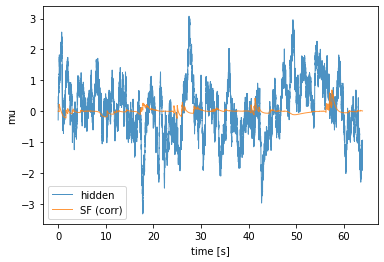

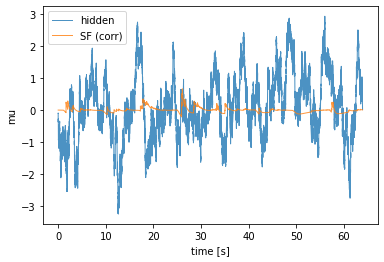

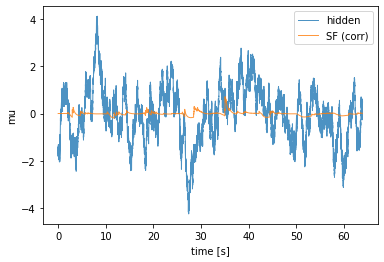

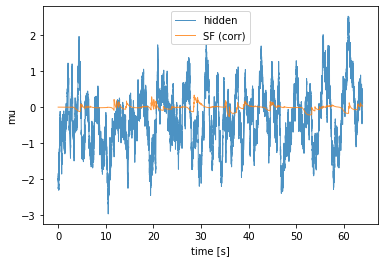

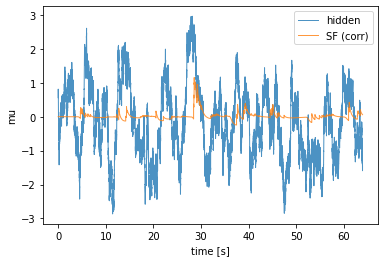

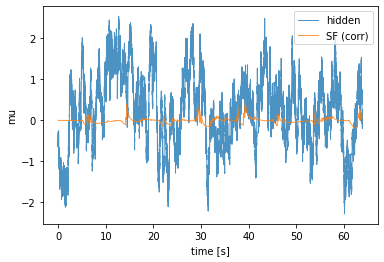

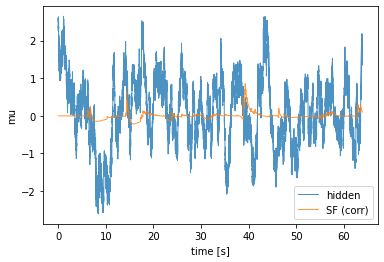

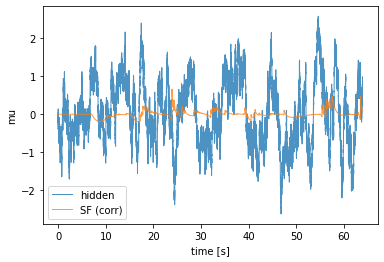

In [127]:
for i in range(0,64,8):
    vplt(v,p,key='w',dim=i,cut=1,c=None,err=True,alpha=0.8)
    vplt(v,p,key='mu',dim=i,cut=1,c=None,err=True,alpha=0.8)
    vplt(v,p,key='Sx',dim=i,cut=1,c=None,err=True,alpha=0.8)
    vplt(v,p,key='y',dim=1,cut=1,c=None,err=True,alpha=0.8)
    plt.legend(['hidden','SF (corr)','input spikes','output spikes'])

    plt.show(), plt.close()

In [128]:
np.mean((v['mu'] - v['w'])**2, axis = 0) / np.var(v['w'], axis = 0)

array([1.02960647, 0.99927229, 0.99701583, 0.97856453, 1.02990992,
       1.17129509, 1.01458353, 1.03257893, 1.02226573, 1.1241098 ,
       1.00961924, 0.98806775, 1.02460479, 1.04706919, 1.02881417,
       0.98732663, 0.98971828, 1.05141401, 1.05307784, 0.99486904,
       1.12854371, 1.01487253, 1.05113966, 1.06283948, 1.18678505,
       1.0031738 , 1.05860121, 1.04188038, 1.01960743, 1.00152078,
       1.02429002, 0.97182941, 1.00536085, 1.09793854, 1.16164047,
       1.01333463, 1.03662252, 0.99751827, 1.1293105 , 1.04567617,
       1.07437706, 1.0152008 , 1.04488422, 0.99233048, 1.00252249,
       1.02507509, 0.98561526, 1.12003162, 1.00852657, 1.112381  ,
       1.00372178, 1.19546494, 1.00927049, 0.99581302, 0.97676806,
       0.98139811, 1.00848328, 1.1050036 , 0.99224345, 0.97772442,
       0.97935476, 0.95999354, 1.11798324, 1.05689807])

In [118]:
np.var(v['w'], axis = 0)

array([1.06538165, 0.94783902, 0.86127599, 1.08920744, 0.90101973,
       0.94285475, 0.71411866, 1.02655547, 1.35222505, 1.02872731,
       0.93101435, 1.0428704 , 0.89041133, 0.78931001, 0.68492512,
       1.141344  , 0.77731892, 0.88552451, 1.05521255, 1.01914313,
       0.91640856, 0.95424541, 0.72865921, 0.76911373, 1.13038107,
       1.04563639, 1.05832655, 1.40627137, 1.08744028, 0.98856825,
       0.78105012, 1.0597248 , 1.5453045 , 1.07605059, 1.24675848,
       0.97145075, 0.95943096, 0.97680474, 0.81717177, 0.93867344,
       0.69695689, 0.88233677, 0.94110539, 0.89533045, 0.9657553 ,
       0.95037419, 0.90107642, 0.97052218, 0.91388365, 1.16984429,
       0.72229922, 0.90821274, 0.77857031, 0.7401608 , 0.71475861,
       0.83370629, 1.14962024, 0.82312119, 0.97384419, 1.000299  ,
       0.95469153, 0.82357837, 1.02152685, 1.06750364])

In [103]:
np.diagonal(np.mean(v['sig2'], axis = 0), axis1 = 0, axis2 = 1).flatten()

array([0.99996677, 0.99995211, 0.99996435, 0.99997259, 0.99995713,
       0.99996798, 0.99996984, 0.99995565, 0.99995498, 0.99992498,
       0.9999535 , 0.99996907, 0.9999418 , 0.99996786, 0.99995955,
       0.99997237, 0.99996177, 0.99993786, 0.9999521 , 0.99997084,
       0.99996756, 0.99995951, 0.99997169, 0.9999551 , 0.99996358,
       0.999965  , 0.99996713, 0.99994762, 0.99995887, 0.99996841,
       0.99997041, 0.99996036, 0.99995058, 0.99997136, 0.99996067,
       0.99995905, 0.99995962, 0.99996961, 0.99996966, 0.99996573,
       0.99994901, 0.99995778, 0.99996537, 0.9999633 , 0.99996445,
       0.99996873, 0.99996443, 0.99996175, 0.99996623, 0.99996332,
       0.99996813, 0.99995816, 0.99994017, 0.99997675, 0.99996369,
       0.99997088, 0.99996434, 0.99995652, 0.99997124, 0.99997744,
       0.99997832, 0.9999712 , 0.99996727, 0.99997948])

In [104]:
sum(np.mean(p['g0'] * np.exp(1/2 * p['beta']**2 * v['x']**2), axis = 0))

64.0024180110731

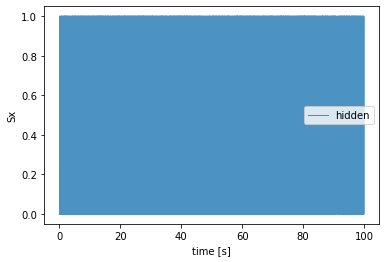

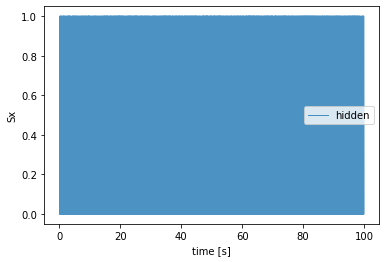

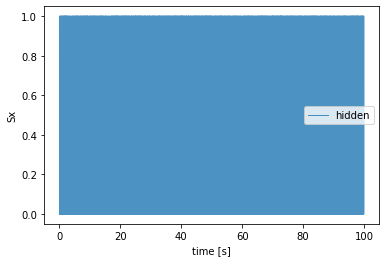

In [35]:
for i in range(p['dim']):
    vplt(v,p,key='Sx',dim=i,cut=1,c=None,err=True,alpha=0.8)
    plt.legend(['hidden','SF (corr)'])

    plt.show(), plt.close()